In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_5.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/04/2020 00:08:37 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 00:08:38 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 00:08:39 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 00:08:39 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 00:08:40 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run06_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

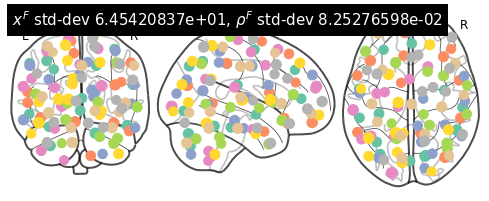

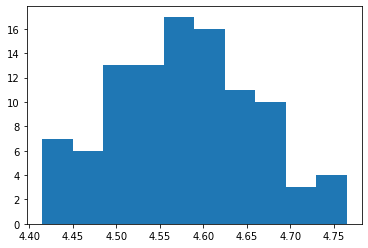

(<nilearn.plotting.displays.OrthoProjector at 0x7fe7001fa1d0>,
 tensor([[-3.2654e+01, -3.0546e+01, -2.2284e+01],
         [ 3.6174e+01, -5.8774e+00,  5.9392e+01],
         [ 4.9514e+01, -4.8272e+01, -2.1157e+01],
         [-3.5138e+01, -6.0374e+01,  4.7076e+01],
         [-2.7682e+01,  3.6722e+01,  3.8122e+01],
         [ 1.9140e+00,  4.3370e+01,  7.7949e+00],
         [-1.4018e-02, -8.0223e+01, -5.0976e+00],
         [ 1.6925e+01, -7.4472e+01,  4.2119e+01],
         [-5.3078e+01, -3.4902e+01,  4.4584e+01],
         [ 5.5386e+01, -2.3853e+01,  2.2096e+01],
         [-5.3526e+01, -4.2310e+00, -8.8228e+00],
         [ 1.5752e+01, -7.5236e+01, -2.9071e+01],
         [-3.1430e+01, -7.3320e+01, -4.2251e+01],
         [ 3.5247e+01,  2.9364e+01, -1.8181e+01],
         [-9.3654e+00,  1.9246e+00,  6.8130e+01],
         [-6.6583e+00,  3.0476e+01,  5.4956e+01],
         [ 3.6771e+01, -7.6467e+01,  2.1678e+01],
         [ 4.3342e+01,  3.7471e+01,  2.4873e+01],
         [ 1.1081e+01, -5.1030e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 00:09:44 [Epoch 1] (6292ms) Posterior free-energy 8.11183718e+09 = KL from prior 1.36666680e+07 - log-likelihood -8.09817037e+09
10/04/2020 00:09:44 Saving checkpoint...
10/04/2020 00:09:50 [Epoch 2] (6103ms) Posterior free-energy 7.90562304e+09 = KL from prior 8.32710800e+06 - log-likelihood -7.89729536e+09
10/04/2020 00:09:56 [Epoch 3] (5977ms) Posterior free-energy 7.76219136e+09 = KL from prior 5.90438000e+06 - log-likelihood -7.75628646e+09
10/04/2020 00:10:02 [Epoch 4] (5928ms) Posterior free-energy 7.65799987e+09 = KL from prior 4.09754975e+06 - log-likelihood -7.65390285e+09
10/04/2020 00:10:07 [Epoch 5] (5931ms) Posterior free-energy 7.58674586e+09 = KL from prior 2.49088900e+06 - log-likelihood -7.58425498e+09
10/04/2020 00:10:14 [Epoch 6] (6013ms) Posterior free-energy 7.53097472e+09 = KL from prior 1.51582025e+06 - log-likelihood -7.52945766e+09
10/04/2020 00:10:19 [Epoch 7] (5942ms) Posterior free-energy 7.48611328e+09 = KL from prior 1.12124125e+06 - log-likeli

Epoch   403: reducing learning rate of group 0 to 5.0000e-03.
Epoch   403: reducing learning rate of group 1 to 5.0000e-04.
Epoch   403: reducing learning rate of group 2 to 5.0000e-03.
Epoch   403: reducing learning rate of group 3 to 5.0000e-04.


10/04/2020 00:50:05 [Epoch 404] (6009ms) Posterior free-energy 5.22474547e+09 = KL from prior 1.65692862e+06 - log-likelihood -5.22308915e+09
10/04/2020 00:50:11 [Epoch 405] (6011ms) Posterior free-energy 5.19434598e+09 = KL from prior 1.65458988e+06 - log-likelihood -5.19269120e+09
10/04/2020 00:50:17 [Epoch 406] (6033ms) Posterior free-energy 5.19301120e+09 = KL from prior 1.65366162e+06 - log-likelihood -5.19135795e+09
10/04/2020 00:50:23 [Epoch 407] (5995ms) Posterior free-energy 5.19242189e+09 = KL from prior 1.65400400e+06 - log-likelihood -5.19076813e+09
10/04/2020 00:50:29 [Epoch 408] (6007ms) Posterior free-energy 5.19207834e+09 = KL from prior 1.65242350e+06 - log-likelihood -5.19042714e+09
10/04/2020 00:50:35 [Epoch 409] (6014ms) Posterior free-energy 5.19157094e+09 = KL from prior 1.65703062e+06 - log-likelihood -5.18991411e+09
10/04/2020 00:50:41 [Epoch 410] (5986ms) Posterior free-energy 5.19119462e+09 = KL from prior 1.65606625e+06 - log-likelihood -5.18953779e+09
10/04/

Epoch   584: reducing learning rate of group 0 to 2.5000e-03.
Epoch   584: reducing learning rate of group 1 to 2.5000e-04.
Epoch   584: reducing learning rate of group 2 to 2.5000e-03.
Epoch   584: reducing learning rate of group 3 to 2.5000e-04.


10/04/2020 01:08:17 [Epoch 585] (5952ms) Posterior free-energy 5.17200589e+09 = KL from prior 1.70066450e+06 - log-likelihood -5.17030502e+09
10/04/2020 01:08:23 [Epoch 586] (5989ms) Posterior free-energy 5.17063219e+09 = KL from prior 1.69952125e+06 - log-likelihood -5.16893389e+09
10/04/2020 01:08:29 [Epoch 587] (5969ms) Posterior free-energy 5.17026918e+09 = KL from prior 1.69558812e+06 - log-likelihood -5.16857344e+09
10/04/2020 01:08:35 [Epoch 588] (6147ms) Posterior free-energy 5.17026662e+09 = KL from prior 1.69478012e+06 - log-likelihood -5.16857242e+09
10/04/2020 01:08:41 [Epoch 589] (6143ms) Posterior free-energy 5.16997683e+09 = KL from prior 1.69724012e+06 - log-likelihood -5.16828006e+09
10/04/2020 01:08:47 [Epoch 590] (6147ms) Posterior free-energy 5.16992563e+09 = KL from prior 1.69820662e+06 - log-likelihood -5.16822784e+09
10/04/2020 01:08:53 [Epoch 591] (6147ms) Posterior free-energy 5.16993229e+09 = KL from prior 1.69710400e+06 - log-likelihood -5.16823347e+09
10/04/

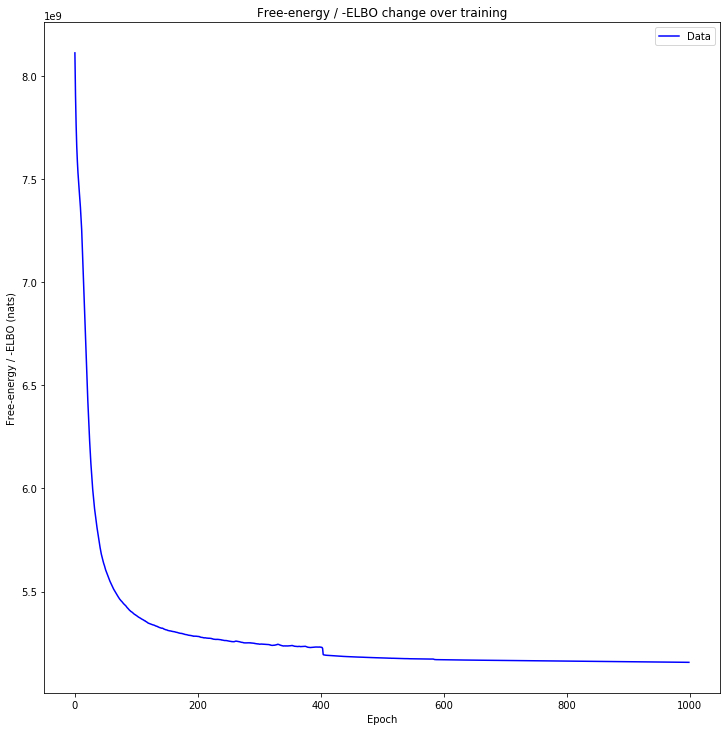

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/04/2020 01:49:59 [Epoch 1] (693ms) Posterior free-energy 1.26933427e+09 = KL from prior 9.73458594e+04 - log-likelihood -1.26923699e+09
10/04/2020 01:49:59 Saving checkpoint...
10/04/2020 01:50:00 [Epoch 2] (701ms) Posterior free-energy 1.24568000e+09 = KL from prior 9.45200625e+04 - log-likelihood -1.24558554e+09
10/04/2020 01:50:00 [Epoch 3] (700ms) Posterior free-energy 1.21808640e+09 = KL from prior 9.25554922e+04 - log-likelihood -1.21799373e+09
10/04/2020 01:50:01 [Epoch 4] (696ms) Posterior free-energy 1.18599795e+09 = KL from prior 9.09000312e+04 - log-likelihood -1.18590720e+09
10/04/2020 01:50:02 [Epoch 5] (696ms) Posterior free-energy 1.16849075e+09 = KL from prior 8.78228906e+04 - log-likelihood -1.16840307e+09
10/04/2020 01:50:03 [Epoch 6] (697ms) Posterior free-energy 1.14694669e+09 = KL from prior 8.67547500e+04 - log-likelihood -1.14685990e+09
10/04/2020 01:50:03 [Epoch 7] (693ms) Posterior free-energy 1.13358771e+09 = KL from prior 8.59877578e+04 - log-likelihood -1

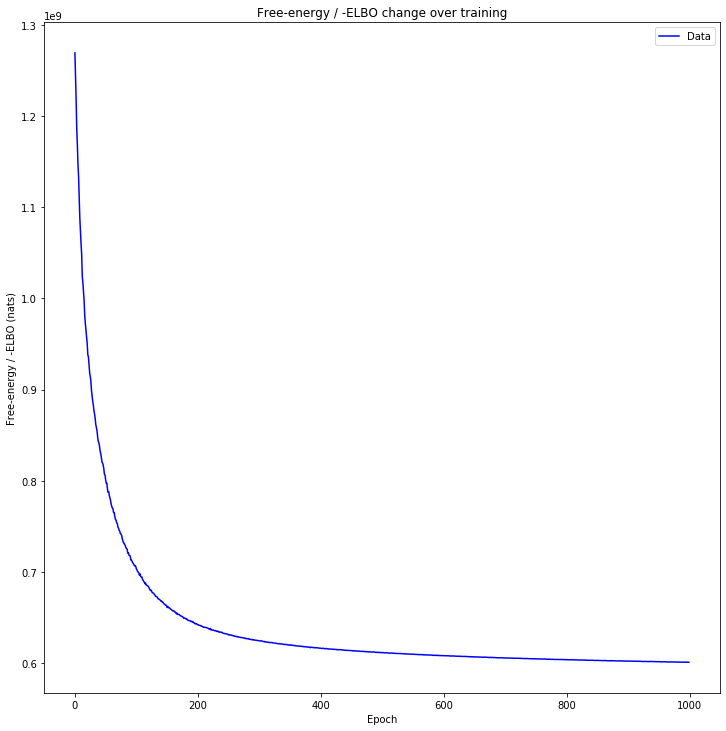

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

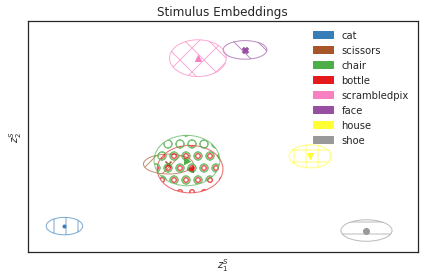

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

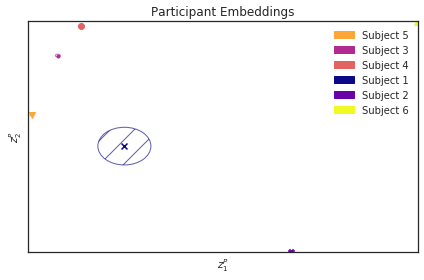

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/04/2020 02:01:40 Plotting factors for Participant 3, run 10


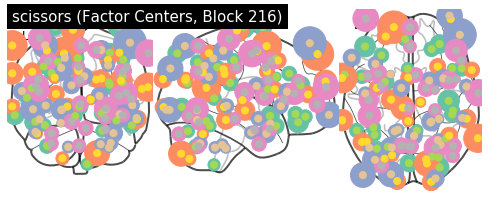

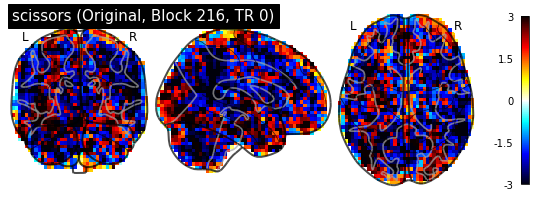

10/04/2020 02:01:42 Reconstruction Error (Frobenius Norm): 1.18635948e+02 out of 6.06697571e+02


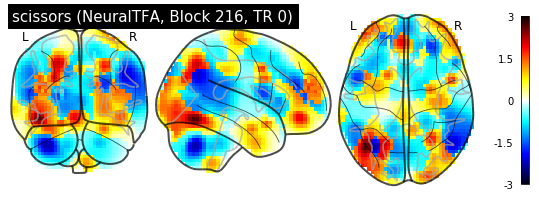

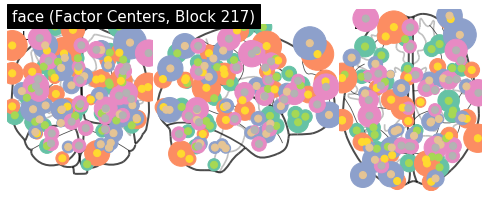

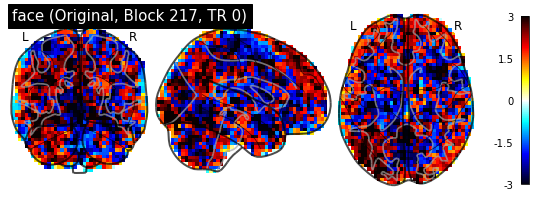

10/04/2020 02:01:45 Reconstruction Error (Frobenius Norm): 1.32937454e+02 out of 6.44471375e+02


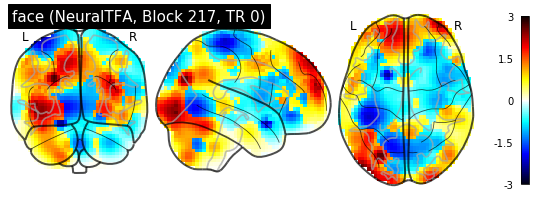

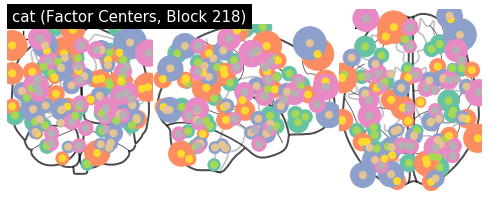

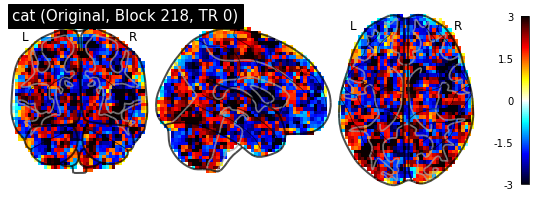

10/04/2020 02:01:48 Reconstruction Error (Frobenius Norm): 1.21001732e+02 out of 6.16280273e+02


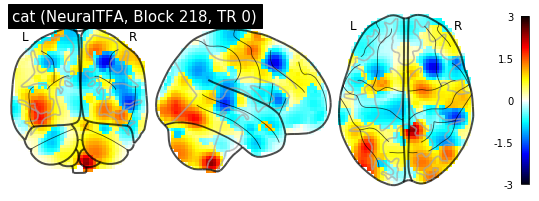

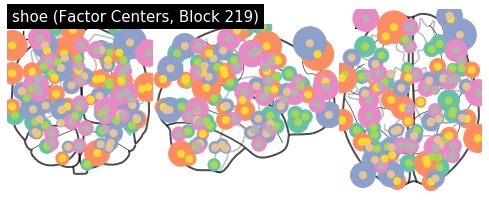

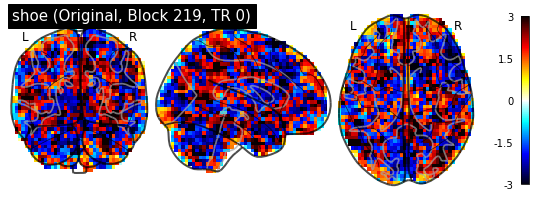

10/04/2020 02:01:51 Reconstruction Error (Frobenius Norm): 1.53945251e+02 out of 7.14641724e+02


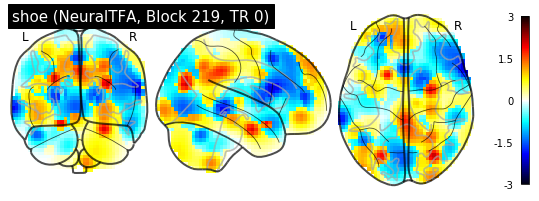

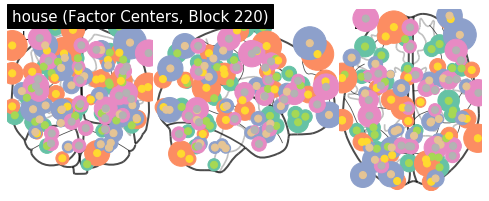

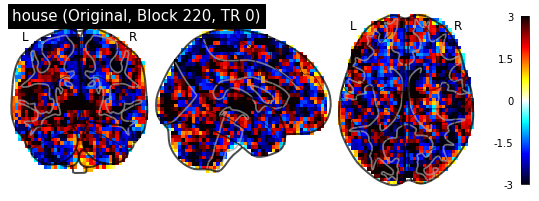

10/04/2020 02:01:54 Reconstruction Error (Frobenius Norm): 1.23869125e+02 out of 6.72908447e+02


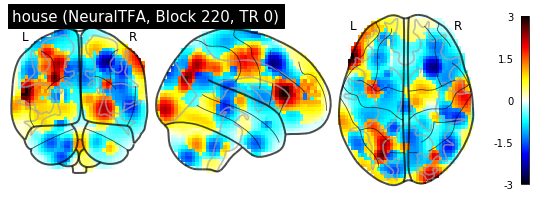

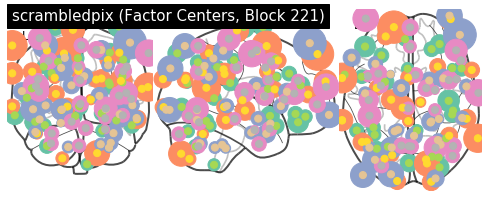

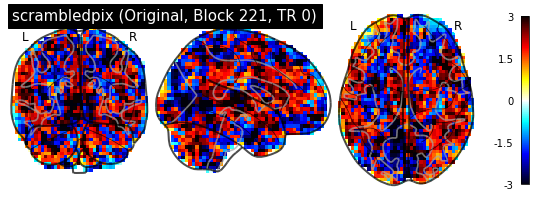

10/04/2020 02:01:57 Reconstruction Error (Frobenius Norm): 1.40491882e+02 out of 6.37884460e+02


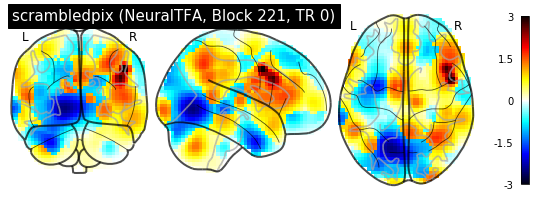

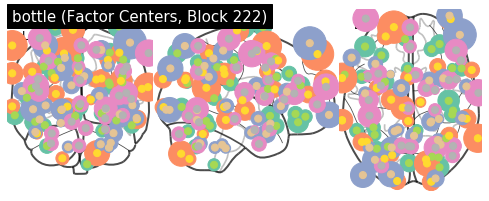

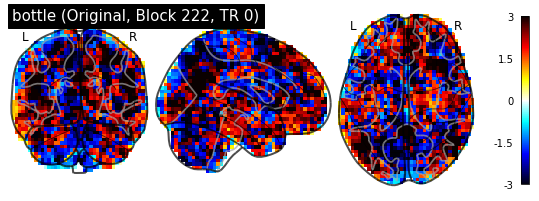

10/04/2020 02:02:00 Reconstruction Error (Frobenius Norm): 1.64350159e+02 out of 7.34422363e+02


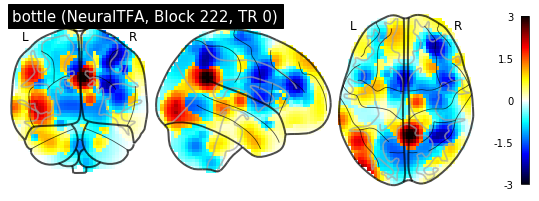

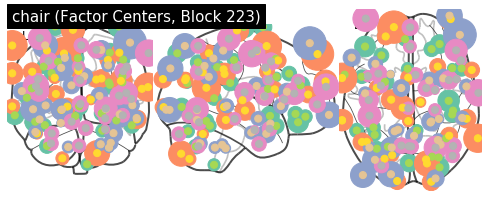

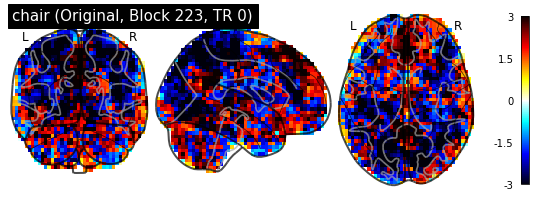

10/04/2020 02:02:03 Reconstruction Error (Frobenius Norm): 1.58327148e+02 out of 6.50982178e+02


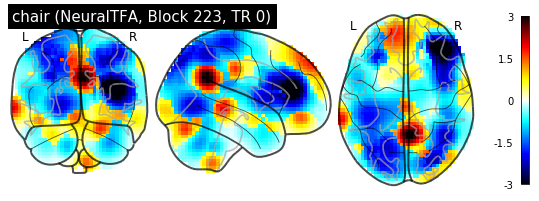

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

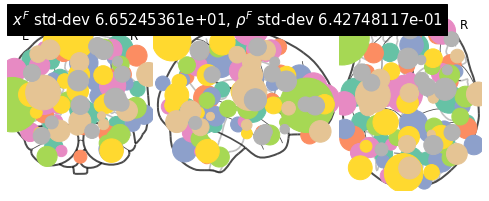

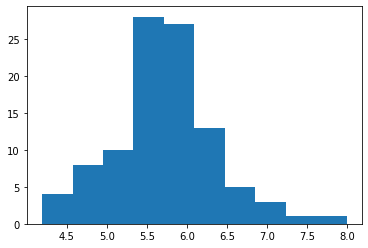

(<nilearn.plotting.displays.OrthoProjector at 0x7fe6a0d10b50>,
 tensor([[ -32.0550,  -47.1640,  -20.5154],
         [  41.0584,  -15.3526,   59.4071],
         [  38.4679,  -57.6109,  -20.1617],
         [ -30.2238,  -58.6918,   46.7966],
         [ -21.2882,   33.9246,   28.5525],
         [   5.5296,   39.9056,   -9.7116],
         [   0.9406,  -77.9073,   -3.9947],
         [  17.1335,  -77.9299,   33.1150],
         [ -51.3275,  -39.0360,   48.5599],
         [  60.2584,  -40.0135,   17.4538],
         [ -57.8303,   -8.1009,   -2.3599],
         [  24.0464,  -73.8193,  -16.7773],
         [ -27.8135,  -72.7811,  -43.0191],
         [  28.9466,   52.2373,  -30.4327],
         [ -17.1738,   -4.1410,   56.3867],
         [  -3.3745,   19.6697,   62.2204],
         [  31.4062,  -77.0998,   30.8950],
         [  43.2737,   21.1463,   32.6947],
         [   0.2494,  -55.9161,  -53.8141],
         [ -60.7083,  -56.6689,    8.8349],
         [  43.3112,    2.6082,  -27.7344],
         [ -3

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 02:02:13 Average reconstruction error (MSE): 5.22702402e+02 +/- 4.36852407e+01
10/04/2020 02:02:13 Average data norm (Euclidean): 6.02752873e+02 +/- 6.20613932e+01
10/04/2020 02:02:13 Percent average reconstruction error: 86.959966 +/- 3.81033849e+00


(array([556.1383667 , 532.17285156, 497.70095825, 505.72018433,
        522.80932617, 507.05288696, 510.940979  , 485.25994873,
        556.16943359, 525.58081055, 499.45327759, 448.53726196,
        469.00741577, 487.97473145, 545.67028809, 539.4979248 ,
        499.79251099, 495.9727478 , 468.0246582 , 500.43688965,
        477.48678589, 533.39086914, 501.18017578, 509.91299438,
        612.96179199, 545.79119873, 506.13748169, 531.03424072,
        477.13864136, 511.83688354, 513.61853027, 475.97375488,
        592.11999512, 499.27786255, 496.24328613, 518.42828369,
        525.22283936, 507.52914429, 542.76538086, 490.11190796,
        522.60040283, 534.17608643, 484.14627075, 455.32849121,
        506.21102905, 551.38574219, 517.20288086, 548.02960205,
        454.46881104, 447.82382202, 466.92993164, 448.2142334 ,
        465.0168457 , 464.75546265, 430.95904541, 494.03875732,
        504.62945557, 459.61212158, 409.69677734, 435.95727539,
        458.39855957, 454.70602417, 462.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[601008256.0, -600863680.0, 144569.625],
 [601145472.0, -600753984.0, 144920.234375]]